In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Edit PYTHONPATH
import sys,os,os.path
sys.path.append(os.path.expanduser('~/git'))

from SectionPreprocess import SectionPreprocess
from BinaryClassification.crf_models.CRFPostprocessModel import CRFPostprocessModel

import numpy as np
import os
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
platform = 'amd64'
test_folder="/Volumes/Tesi/code_division/elf/" + platform
folds = 5

In [3]:
crf = CRFPostprocessModel(
    verbose=False,
    max_iter=10,
    postprocessing_cutoff=0.1,
    postprocessing_min_sections=4,
)

In [4]:
%%time
preprocessor = SectionPreprocess(ground_truth=True)
paths = [f_path.path for f_path in os.scandir(test_folder)]
paths, X, y = preprocessor.preprocess(paths)
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(X, y, paths, test_size=0.33)

CPU times: user 394 ms, sys: 34.4 ms, total: 429 ms
Wall time: 766 ms


In [5]:
param_space = [{
    'lookahead': [x],
    'lookbehind': [x],
    'post_process': [True, False],
} for x in range(0, 9)]

gs = GridSearchCV(
    crf,
    param_space,
    cv=folds,
    n_jobs=1,
    verbose=3,
    refit=True,
)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] lookahead=0, lookbehind=0, post_process=True ....................
[CV]  lookahead=0, lookbehind=0, post_process=True, score=0.9994971782116694, total=   2.4s
[CV] lookahead=0, lookbehind=0, post_process=True ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV]  lookahead=0, lookbehind=0, post_process=True, score=0.9995422207999587, total=   2.4s
[CV] lookahead=0, lookbehind=0, post_process=True ....................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV]  lookahead=0, lookbehind=0, post_process=True, score=0.9996896298300868, total=   2.4s
[CV] lookahead=0, lookbehind=0, post_process=True ....................
[CV]  lookahead=0, lookbehind=0, post_process=True, score=0.9992966100528762, total=   2.3s
[CV] lookahead=0, lookbehind=0, post_process=True ....................
[CV]  lookahead=0, lookbehind=0, post_process=True, score=0.9994869119999864, total=   2.3s
[CV] lookahead=0, lookbehind=0, post_process=False ...................
[CV]  lookahead=0, lookbehind=0, post_process=False, score=0.9870926017449784, total=   2.1s
[CV] lookahead=0, lookbehind=0, post_process=False ...................
[CV]  lookahead=0, lookbehind=0, post_process=False, score=0.9841230844231247, total=   2.4s
[CV] lookahead=0, lookbehind=0, post_process=False ...................
[CV]  lookahead=0, lookbehind=0, post_process=False, score=0.9898504059452374, total=   2.0s
[CV] lookahead=0, lookbehind=0, post_process=False ...................
[CV]  lookahead=0, 

[CV]  lookahead=5, lookbehind=5, post_process=True, score=0.9992429129786886, total=   4.9s
[CV] lookahead=5, lookbehind=5, post_process=True ....................
[CV]  lookahead=5, lookbehind=5, post_process=True, score=0.9994383496951948, total=   5.2s
[CV] lookahead=5, lookbehind=5, post_process=False ...................
[CV]  lookahead=5, lookbehind=5, post_process=False, score=0.9937804902069717, total=   4.5s
[CV] lookahead=5, lookbehind=5, post_process=False ...................
[CV]  lookahead=5, lookbehind=5, post_process=False, score=0.990464237228426, total=   4.9s
[CV] lookahead=5, lookbehind=5, post_process=False ...................
[CV]  lookahead=5, lookbehind=5, post_process=False, score=0.9981858040612513, total=   4.6s
[CV] lookahead=5, lookbehind=5, post_process=False ...................
[CV]  lookahead=5, lookbehind=5, post_process=False, score=0.9970745489021752, total=   5.1s
[CV] lookahead=5, lookbehind=5, post_process=False ...................
[CV]  lookahead=5, 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  7.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=CRFPostprocessModel(C=1, lookahead=0, lookbehind=0, max_iter=10,
          post_process=False, postprocessing_cutoff=0.1,
          postprocessing_min_sections=4, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'lookahead': [0], 'lookbehind': [0], 'post_process': [True, False]}, {'lookahead': [1], 'lookbehind': [1], 'post_process': [True, False]}, {'lookahead': [2], 'lookbehind': [2], 'post_process': [True, False]}, {'lookahead': [3], 'lookbehind': [3], 'post_process': [True, False]}, {'lookah...post_process': [True, False]}, {'lookahead': [8], 'lookbehind': [8], 'post_process': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [6]:
cv_df = pd.DataFrame(gs.cv_results_)
cv_df.to_csv('evaluation/grid_search.csv')

# Visualize
cv_df.sort_values(by='rank_test_score')

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        2.349351         0.026399         0.999504          0.999487   
10       4.579085         0.187149         0.999452          0.999448   
8        4.247955         0.145514         0.999452          0.999454   
12       5.082048         0.208407         0.999432          0.999432   
2        2.905558         0.058587         0.999430          0.999445   
4        3.276620         0.092111         0.999421          0.999421   
14       5.636954         0.241892         0.999402          0.999395   
6        3.852447         0.119508         0.999380          0.999380   
16       6.067180         0.295912         0.999367          0.999379   
17       6.165456         0.272453         0.996625          0.997342   
15       5.465993         0.237997         0.996137          0.997208   
7        3.731915         0.114957         0.996025          0.997108   
13       4.957630         0.200175         0.995799          0.997138   
9        4.243362         0.145336         0.995613          0.997187   
11       4.647225         0.176490         0.995140          0.997020   
5        3.438936         0.086089         0.994366          0.995404   
3        2.839821         0.052691         0.992065          0.993562   
1        2.181692         0.018410         0.988106          0.988984   

   param_lookahead param_lookbehind param_post_process  \
0                0                0               True   
10               5                5               True   
8                4                4               True   
12               6                6               True   
2                1                1               True   
4                2                2               True   
14               7                7               True   
6                3                3               True   
16               8                8               True   
17               8                8              False   
15               7                7              False   
7                3                3              False   
13               6                6              False   
9                4                4              False   
11               5                5              False   
5                2                2              False   
3                1                1              False   
1                0                0              False   

                                               params  rank_test_score  \
0   {'lookahead': 0, 'lookbehind': 0, 'post_proces...                1   
10  {'lookahead': 5, 'lookbehind': 5, 'post_proces...                2   
8   {'lookahead': 4, 'lookbehind': 4, 'post_proces...                3   
12  {'lookahead': 6, 'lookbehind': 6, 'post_proces...                4   
2   {'lookahead': 1, 'lookbehind': 1, 'post_proces...                5   
4   {'lookahead': 2, 'lookbehind': 2, 'post_proces...                6   
14  {'lookahead': 7, 'lookbehind': 7, 'post_proces...                7   
6   {'lookahead': 3, 'lookbehind': 3, 'post_proces...                8   
16  {'lookahead': 8, 'lookbehind': 8, 'post_proces...                9   
17  {'lookahead': 8, 'lookbehind': 8, 'post_proces...               10   
15  {'lookahead': 7, 'lookbehind': 7, 'post_proces...               11   
7   {'lookahead': 3, 'lookbehind': 3, 'post_proces...               12   
13  {'lookahead': 6, 'lookbehind': 6, 'post_proces...               13   
9   {'lookahead': 4, 'lookbehind': 4, 'post_proces...               14   
11  {'lookahead': 5, 'lookbehind': 5, 'post_proces...               15   
5   {'lookahead': 2, 'lookbehind': 2, 'post_proces...               16   
3   {'lookahead': 1, 'lookbehind': 1, 'post_proces...               17   
1   {'lookahead': 0, 'lookbehind': 0, 'post_proces...               18   

    split0_test_score       ...         split2_test_score  split2_train_score  \
0            0.999497    

In [7]:
# Final test
gs.best_estimator_.score(X_test, y_test)

0.99957324101088318

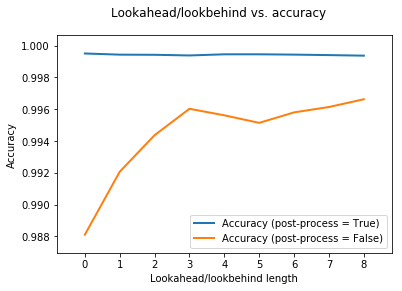

In [8]:
import matplotlib.ticker

# Read from CSV (we don't have to recompute)
cv_df = pd.read_csv('evaluation/grid_search.csv')

fig, ax = plt.subplots()
fig.suptitle('Lookahead/lookbehind vs. accuracy')
ax.set_xlabel('Lookahead/lookbehind length')
ax.set_ylabel('Accuracy')
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.margins(0.1) # to visualize the tick for accuracy=1.0

lines = []

#ax2 = ax.twinx()
#ax2.set_ylabel('Training time (s)')

for post_process in [True, False]:

    params = cv_df[cv_df['param_post_process'] == post_process]['param_lookahead'].values.astype('int')
    scores = cv_df[cv_df['param_post_process'] == post_process]['mean_test_score'].values
    fit_time = cv_df[cv_df['param_post_process'] == post_process]['mean_fit_time'].values
    
    lines.append(ax.plot(params, scores, linewidth=2.0, label='Accuracy (post-process = {})'.format(post_process)))
    #lines.append(ax2.plot(params, fit_time, '--', linewidth=2.0, label='Training time (post-process = {})'.format(post_process)))

from functools import reduce
lns = reduce(lambda x, y: x+y, lines)
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4)

fig.savefig('figures/hyperparam_codesection.pdf', bbox_inches='tight')